<a href="https://colab.research.google.com/github/gowthamich35/Electric_vehicle_MarketSegmentation/blob/master/Ev_market_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
d1_path = '/content/drive/MyDrive/FL_data/ev_data1.csv'
d2_path = '/content/drive/MyDrive/FL_data/ev2_bikewale.csv'

In [3]:
import pandas as pd

df1 = pd.read_csv(d1_path)
df2 = pd.read_csv(d2_path)


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Model Name                   39 non-null     object
 1   Price                        39 non-null     int64 
 2   Riding Range (km)            39 non-null     int64 
 3   Top Speed (kmph)             39 non-null     int64 
 4   Weight (kg)                  39 non-null     int64 
 5   Battery Charging Time (hrs)  39 non-null     int64 
 6   Rated Power (W)              39 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.3+ KB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              797 non-null    object 
 1   Used it for         844 non-null    object 
 2   Owned for           844 non-null    object 
 3   Ridden for          668 non-null    object 
 4   rating              844 non-null    int64  
 5   Visual Appeal       739 non-null    float64
 6   Reliability         716 non-null    float64
 7   Performance         345 non-null    float64
 8   Service Experience  703 non-null    float64
 9   Extra Features      185 non-null    float64
 10  Comfort             530 non-null    float64
 11  Maintenance cost    180 non-null    float64
 12  Value for Money     390 non-null    float64
 13  Model Name          844 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 92.4+ KB


In [6]:
df1.isnull().sum()

Model Name                     0
Price                          0
Riding Range (km)              0
Top Speed (kmph)               0
Weight (kg)                    0
Battery Charging Time (hrs)    0
Rated Power (W)                0
dtype: int64

In [7]:
df2.isnull().sum()

review                 47
Used it for             0
Owned for               0
Ridden for            176
rating                  0
Visual Appeal         105
Reliability           128
Performance           499
Service Experience    141
Extra Features        659
Comfort               314
Maintenance cost      664
Value for Money       454
Model Name              0
dtype: int64

In [8]:
data = df1.merge(df2,how = 'left', on='Model Name')
data.head()

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,Ampere Magnus EX,104758,121,53,90,7,1200,Specification is very good\nFuel save is 300% ...,Everything,Never owned,NaN,5,4.0,4.0,4.0,4.0,5.0,NaN,4.0,NaN
1,Ampere Magnus EX,104758,121,53,90,7,1200,Less buying cost.. I bought around 78k... Rang...,Daily Commute,< 3 months,< 5000 kms,4,4.0,3.0,4.0,3.0,3.0,NaN,3.0,NaN
2,Ampere Magnus EX,104758,121,53,90,7,1200,1. Buying experience is very excellent\n2. Rid...,Daily Commute,< 3 months,< 5000 kms,5,4.0,NaN,5.0,NaN,4.0,NaN,4.0,NaN
3,Ampere Magnus EX,104758,121,53,90,7,1200,The vehicle was not good routine usage. The ba...,Daily Commute,> 1 yr,5000-10000 kms,1,3.0,1.0,2.0,3.0,1.0,NaN,3.0,NaN
4,Ampere Magnus EX,104758,121,53,90,7,1200,Recently i have purchased a magnus ex bike fro...,Daily Commute,< 3 months,< 5000 kms,3,4.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN


In [9]:
((data.isnull().sum() * 100/data.shape[0])).sort_values()

Model Name                      0.000000
rating                          0.000000
Used it for                     0.000000
Rated Power (W)                 0.000000
Battery Charging Time (hrs)     0.000000
Owned for                       0.000000
Top Speed (kmph)                0.000000
Riding Range (km)               0.000000
Price                           0.000000
Weight (kg)                     0.000000
review                          5.568720
Visual Appeal                  12.440758
Reliability                    15.165877
Service Experience             16.706161
Ridden for                     20.853081
Comfort                        37.203791
Value for Money                53.791469
Performance                    59.123223
Extra Features                 78.080569
Maintenance cost               78.672986
dtype: float64

In [10]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.1 MB/s eta 0:00:00


In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to determine sentiment label
def get_sentiment_label(text):
    if pd.isna(text):
        return 'neutral'

    scores = analyzer.polarity_scores(text)
    if scores['pos'] > scores['neg']:
        return 'positive'
    elif scores['neg'] > scores['pos']:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the 'review' column and create a new 'sentiment' column
data['sentiment'] = data['review'].apply(get_sentiment_label)


In [12]:
data['sentiment'].value_counts()

sentiment
positive    531
negative    260
neutral      53
Name: count, dtype: int64

In [13]:
data.head()

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),review,Used it for,Owned for,...,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment
0,Ampere Magnus EX,104758,121,53,90,7,1200,Specification is very good\nFuel save is 300% ...,Everything,Never owned,...,5,4.0,4.0,4.0,4.0,5.0,NaN,4.0,NaN,positive
1,Ampere Magnus EX,104758,121,53,90,7,1200,Less buying cost.. I bought around 78k... Rang...,Daily Commute,< 3 months,...,4,4.0,3.0,4.0,3.0,3.0,NaN,3.0,NaN,positive
2,Ampere Magnus EX,104758,121,53,90,7,1200,1. Buying experience is very excellent\n2. Rid...,Daily Commute,< 3 months,...,5,4.0,NaN,5.0,NaN,4.0,NaN,4.0,NaN,positive
3,Ampere Magnus EX,104758,121,53,90,7,1200,The vehicle was not good routine usage. The ba...,Daily Commute,> 1 yr,...,1,3.0,1.0,2.0,3.0,1.0,NaN,3.0,NaN,positive
4,Ampere Magnus EX,104758,121,53,90,7,1200,Recently i have purchased a magnus ex bike fro...,Daily Commute,< 3 months,...,3,4.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,positive


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Model Name                   844 non-null    object 
 1   Price                        844 non-null    int64  
 2   Riding Range (km)            844 non-null    int64  
 3   Top Speed (kmph)             844 non-null    int64  
 4   Weight (kg)                  844 non-null    int64  
 5   Battery Charging Time (hrs)  844 non-null    int64  
 6   Rated Power (W)              844 non-null    int64  
 7   review                       797 non-null    object 
 8   Used it for                  844 non-null    object 
 9   Owned for                    844 non-null    object 
 10  Ridden for                   668 non-null    object 
 11  rating                       844 non-null    int64  
 12  Visual Appeal                739 non-null    float64
 13  Reliability         

Selecting columns which are likely to represent different aspects of the products being reviewed, such as their visual appeal, reliability, performance, service experience, extra features, comfort, maintenance cost, and value for money.

In [15]:
ds = data.iloc[:, 12:20].copy()

In [16]:
ds.tail()

,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
839,5.0,5.0,NaN,5.0,NaN,4.0,NaN,5.0
840,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0
841,5.0,5.0,NaN,5.0,NaN,5.0,NaN,5.0
842,4.0,3.0,NaN,4.0,NaN,4.0,NaN,4.0
843,3.0,2.0,NaN,3.0,NaN,3.0,NaN,3.0


In [17]:
ds.isnull().sum()

Visual Appeal         105
Reliability           128
Performance           499
Service Experience    141
Extra Features        659
Comfort               314
Maintenance cost      664
Value for Money       454
dtype: int64

In [18]:
ds = ds.fillna(0.0)

In [19]:
ds.isnull().sum().sum()

0

In [20]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visual Appeal       844 non-null    float64
 1   Reliability         844 non-null    float64
 2   Performance         844 non-null    float64
 3   Service Experience  844 non-null    float64
 4   Extra Features      844 non-null    float64
 5   Comfort             844 non-null    float64
 6   Maintenance cost    844 non-null    float64
 7   Value for Money     844 non-null    float64
dtypes: float64(8)
memory usage: 52.9 KB


In [21]:
ds.describe()

,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
count,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000
mean,3.309242,2.811611,1.441943,2.619668,0.643365,2.300948,0.723934,1.562796
std,1.775772,1.883010,1.984565,1.900525,1.434060,2.085241,1.532052,1.974833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000
75%,5.000000,5.000000,3.250000,5.000000,0.000000,4.000000,0.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [22]:
ds.mean()

Visual Appeal         3.309242
Reliability           2.811611
Performance           1.441943
Service Experience    2.619668
Extra Features        0.643365
Comfort               2.300948
Maintenance cost      0.723934
Value for Money       1.562796
dtype: float64

To standardize features by removing the mean and scaling to unit variance we are using StandardScaler. Standardization ensures that each feature contributes equally to the model. Features with larger ranges would otherwise dominate features with smaller ranges. This improves the model performance.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(ds)


PCA is a dimensionality reduction technique that transforms a large set of variables into a smaller one that still contains most of the information in the large set.
It does this by identifying the directions (principal components) in which the data varies the most.


In [24]:
from sklearn.decomposition import PCA

pca = PCA(random_state = 42)
pca.fit(data_scaled)

PCA(random_state=42)

In [25]:
d_pca = pca.transform(data_scaled)

In [26]:
df_pca = pd.DataFrame(d_pca, columns = [f'PC{x +1}' for x in range(len(ds.columns))])


In [27]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.373407,4.082027,-1.039629,0.199422,0.139854,0.474270,-0.426869,0.237387
1,0.175781,2.902330,-0.248451,-0.157599,0.151292,0.131607,-0.013314,-0.207733
2,1.654849,3.473408,-0.375435,-1.488028,0.799178,-0.167972,-1.158085,-0.496822
3,1.135961,1.515073,-0.352069,0.130037,0.739896,-0.747038,0.578926,-0.163109
4,1.113412,0.187068,0.777873,-1.028624,-0.855904,0.396873,0.748850,-0.159009


In [28]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [29]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.845017,0.425007,0.425007
PC2,1.736646,0.376546,0.801553
PC3,0.903486,0.101915,0.903468
PC4,0.517750,0.033468,0.936936
PC5,0.405239,0.020503,0.957439
PC6,0.379558,0.017987,0.975426
PC7,0.337883,0.014254,0.989680
PC8,0.287510,0.010320,1.000000


from matplotlib import pyplot as plt
pca_summary['Standard Deviation'].plot(kind='hist', bins=20, title='Standard Deviation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pca_summary['Proportion of Variance'].plot(kind='hist', bins=20, title='Proportion of Variance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pca_summary['Cumultive Proportion'].plot(kind='hist', bins=20, title='Cumultive Proportion')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pca_summary.plot(kind='scatter', x='Standard Deviation', y='Proportion of Variance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pca_summary.plot(kind='scatter', x='Proportion of Variance', y='Cumultive Proportion', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cumultive Proportion']
  ys = series['Standard Deviation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = pca_summary.sort_values('Cumultive Proportion', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cumultive Proportion')
_ = plt.ylabel('Standard Deviation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cumultive Proportion']
  ys = series['Proportion of Variance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = pca_summary.sort_values('Cumultive Proportion', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cumultive Proportion')
_ = plt.ylabel('Proportion of Variance')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Cumultive Proportion']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Cumultive Proportion'}, axis=1)
              .sort_values('Cumultive Proportion', ascending=True))
  xs = counted['Cumultive Proportion']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = pca_summary.sort_values('Cumultive Proportion', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cumultive Proportion')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
pca_summary['Standard Deviation'].plot(kind='line', figsize=(8, 4), title='Standard Deviation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pca_summary['Proportion of Variance'].plot(kind='line', figsize=(8, 4), title='Proportion of Variance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pca_summary['Cumultive Proportion'].plot(kind='line', figsize=(8, 4), title='Cumultive Proportion')
plt.gca().spines[['top', 'right']].set_visible(False)

**Interpreting Principal Components:**

Factor loadings help interpret the principal components by showing which features contribute most to each component.
A high absolute value in the factor loadings indicates that the corresponding feature has a strong influence on that principal component.

In [30]:
factor_loadings = pd.DataFrame(pca.components_, columns = ds.columns, index = df_pca.columns).T

In [31]:
factor_loadings.style.background_gradient(cmap = 'coolwarm')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Visual Appeal,-0.480170,0.117814,0.063320,-0.730598,0.247014,0.105903,0.375474,0.067539
Reliability,-0.494758,0.124910,-0.002776,0.152447,-0.819319,0.060484,0.117211,0.166384
Performance,-0.128721,0.459145,0.574833,-0.005549,-0.019902,-0.025704,-0.288468,-0.598232
Service Experience,-0.486499,0.100691,-0.054176,0.653781,0.470391,0.052432,0.311210,-0.044129
Extra Features,-0.024373,0.519633,-0.364578,-0.023208,0.116821,0.559390,-0.456829,0.246323
Comfort,-0.418255,-0.304266,0.249807,-0.020111,0.172621,-0.296656,-0.623271,0.404238
Maintenance cost,0.005912,0.513208,-0.386495,-0.054822,0.020302,-0.762039,-0.003360,0.055435
Value for Money,-0.309572,-0.351548,-0.563840,-0.107598,-0.046688,0.009572,-0.260855,-0.617065


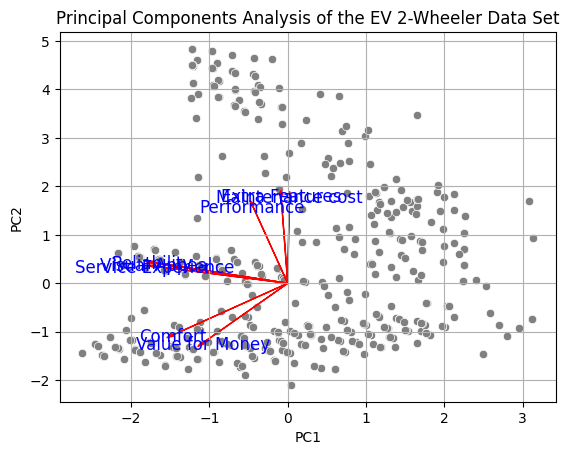

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_pca, x='PC1', y='PC2', color='grey')
index_names = factor_loadings.index
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5,
              head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5,
             index_names[i], fontsize=12, ha='center', color='blue', va='center_baseline')

# Set labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Components Analysis of the EV 2-Wheeler Data Set')
plt.grid(True)
plt.savefig("pca_2w.png", format='png')
plt.show()


In [33]:
from sklearn.cluster import KMeans
data_km28 = [KMeans(n_clusters = k, random_state = 42).fit(data_scaled) for k in range(2, 9)]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

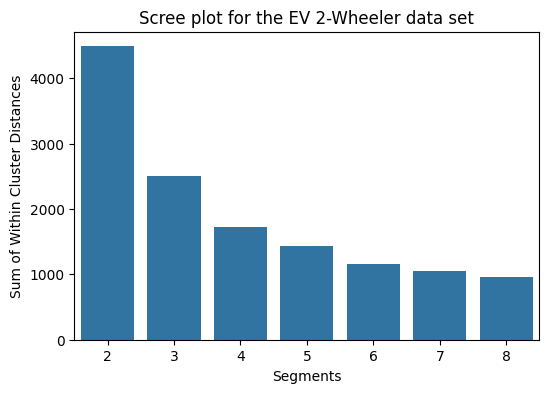

In [34]:
wcss = [model.inertia_ for model in data_km28]
fig = plt.figure(figsize = (6,4))
sns.barplot(x = list(range(2, 9)), y = wcss)
plt.xlabel("Segments")
plt.ylabel('Sum of Within Cluster Distances')
plt.title("Scree plot for the EV 2-Wheeler data set")
plt.savefig("scree_plot.png")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

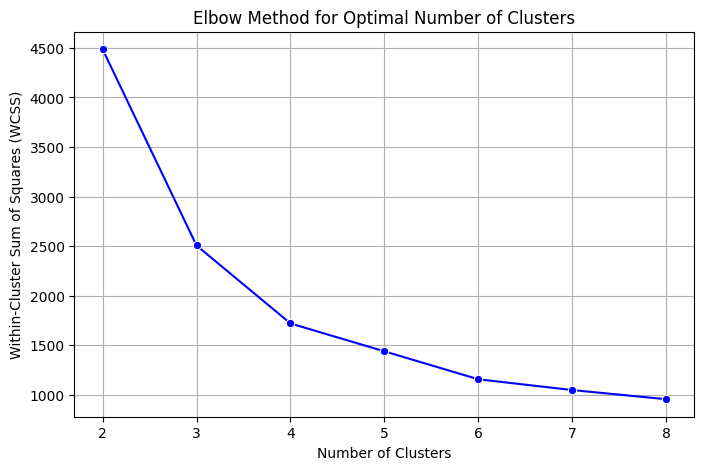

In [35]:
wcss = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

elbow_df = pd.DataFrame({'Clusters': range(2, 9), 'WCSS': wcss})

plt.figure(figsize=(8, 5))
sns.lineplot(x='Clusters', y='WCSS', data=elbow_df, marker='o', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.savefig("elbow_method.png")
plt.show()

<ipython-input-36-8d05809fda52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wcss_diff['WCSS Difference'][0] = 0


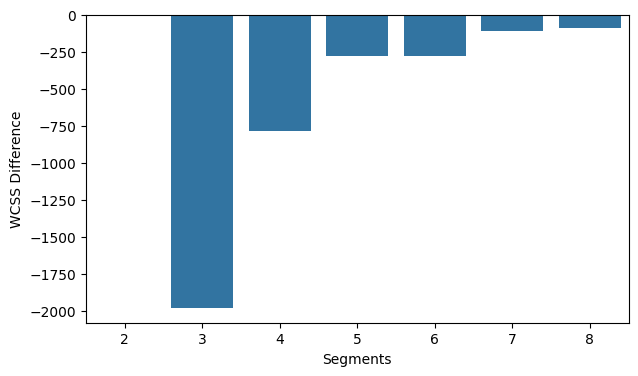

In [36]:
wcss_diff = pd.DataFrame({'Segments':range(2,9),
                          'WCSS Difference': pd.Series(wcss).diff()})
wcss_diff['WCSS Difference'][0] = 0
plt.figure(figsize = (7, 4))
sns.barplot(wcss_diff, x = 'Segments', y = 'WCSS Difference')
plt.savefig("wcss_diff.png")
plt.show()

In [37]:
kmeans = data_km28[2]
data_clust = pd.DataFrame(data_scaled, columns = ds.columns)
data_clust['cluster'] = kmeans.labels_
data_pca = df_pca.copy()
data_pca['cluster'] = kmeans.labels_

**Profiling** **Segments**

In [38]:
dP = ds.copy()
dP['cluster'] = kmeans.labels_
columns_segment = data_clust.columns
data_pivot = dP[columns_segment].groupby('cluster').mean().T
data_pivot_mean = data_pivot.mean(axis = 1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

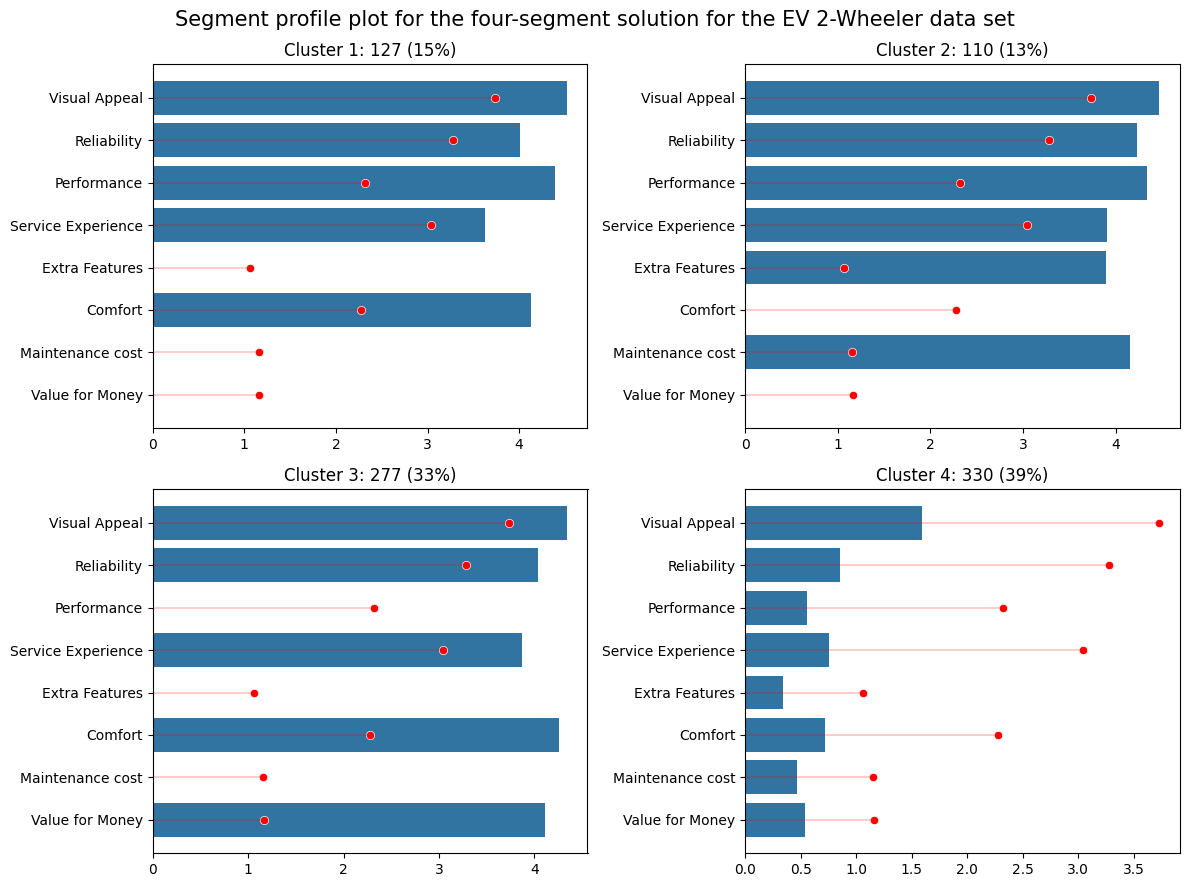

In [39]:
plt.figure(figsize = (12, 9))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(data_pivot, x = i, y = data_pivot.index)
    sns.scatterplot(data_pivot_mean, x = 'Value', y = 'Variable', color = 'red')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha = 0.2)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i+1}: {dP['cluster'].value_counts()[i]} ({dP['cluster'].value_counts()[i]*100/len(dP):.0f}%)")
plt.suptitle("Segment profile plot for the four-segment solution for the EV 2-Wheeler data set", fontsize = 15)
plt.tight_layout()
plt.savefig("segment_profile.png")
plt.show()

**Cluster 1: representing 15% of consumers**,values the electric two-wheeler vehicle for its visual appeal, reliability, performance, service experience, and comfort.**Cluster 2** (**39% of consumers**) expresses dissatisfaction across all aspects, marking them as the largest but least satisfied group. **Cluster 3 (33% of consumers)** appreciates visual appeal, reliability, service experience, comfort, and notably, perceives a strong value for money. Lastly, **Cluster 4 (13% of consumers)**, the smallest segment, values visual appeal, reliability, performance, service experience, extra features, and maintenance cost, showcasing distinct perceptions, particularly on features and costs.

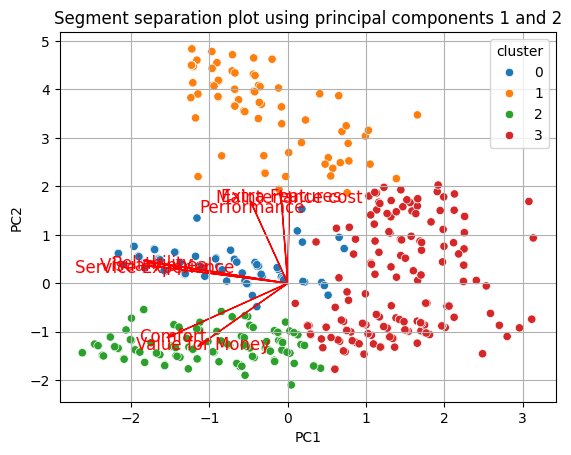

In [40]:
index_names = factor_loadings.index

sns.scatterplot(data_pca, x = 'PC1', y = 'PC2', hue = 'cluster', palette = 'tab10')

for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment separation plot using principal components 1 and 2')
plt.grid(True)
plt.savefig("segment_separation.png")
plt.show()

**Cluster 2 i.e Segment 2 despite being the biggest segment it shows lack of Satisfaction**

**DESCRIBING SEGMENTS**

In [41]:
d_desc = data.copy()
d_desc['cluster'] = kmeans.labels_
d_desc.columns

Index(['Model Name', 'Price', 'Riding Range (km)', 'Top Speed (kmph)',
       'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)',
       'review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'sentiment', 'cluster'],
      dtype='object')

Defining a function such that we can use this fucntion for the plotting of mosiac plot for the columns of the cluster to know the analysis of each review

In [42]:
def mosaicplot(df, color_list, figsize=(5,5), barwidth = 1, title = "Simple Mosaic Plot", xlabel = 'cat'):

    fig, ax = plt.subplots(figsize =figsize)

    p_cnt_ratio_df = df.div(df.sum(1), axis =0)
    ratio_cum_df = p_cnt_ratio_df.cumsum(axis=1)

    col_order = ratio_cum_df.columns.tolist()

    x = [str(n) for n in ratio_cum_df.index.tolist()]

    for col, colour in zip(col_order[::-1], color_list):
        plt.bar(x, ratio_cum_df[col], color=colour, edgecolor='white', width=barwidth, label=col)

    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)


    plt.title(title)
    plt.xlabel("Segments")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.yticks([])
    plt.show()

In [43]:
color_list = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F']
sentiment_cluster = pd.crosstab(index = d_desc['cluster'], columns = d_desc['sentiment'])
sentiment_cluster

sentiment,negative,neutral,positive
cluster,,,
0,11,4,112
1,16,0,94
2,26,41,210
3,207,8,115


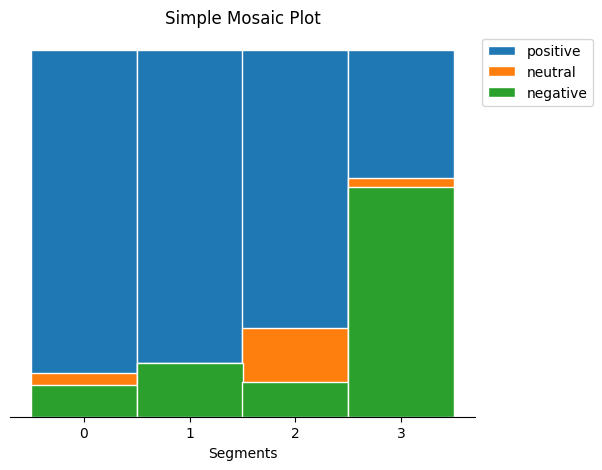

In [44]:
mosaicplot(sentiment_cluster, color_list[:3], figsize=(6,5), barwidth = 1)

In [46]:
used_cluster = pd.crosstab(index = d_desc['cluster'], columns = d_desc['Used it for'])
used_cluster

Used it for,Daily Commute,Everything,Leisure Rides,Occasional Commute,Tours
cluster,,,,,
0,75,39,4,9,0
1,87,19,2,1,1
2,194,55,7,19,2
3,244,47,7,27,5


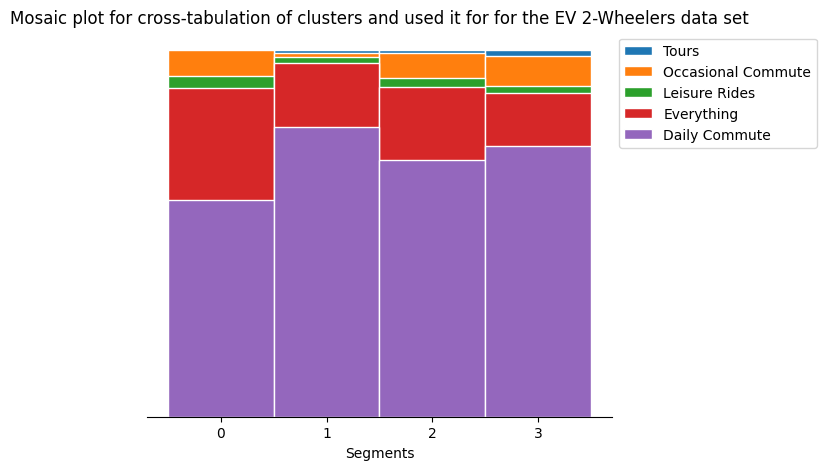

In [47]:
mosaicplot(used_cluster, color_list[:5], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and used it for for the EV 2-Wheelers data set' )


**The above plot shows that people prefer to use the electric vehicles more on the daily basis and everything. Less on Tours and others**

In [48]:
owned_cluster = pd.crosstab(index = d_desc['cluster'], columns = d_desc['Owned for'])
owned_cluster

Owned for,3-6 months,6 months-1 yr,< 3 months,> 1 yr,Never owned,Occasional Commute
cluster,,,,,,
0,16,14,31,10,56,0
1,14,14,43,20,19,0
2,41,51,79,56,50,0
3,40,55,67,117,50,1


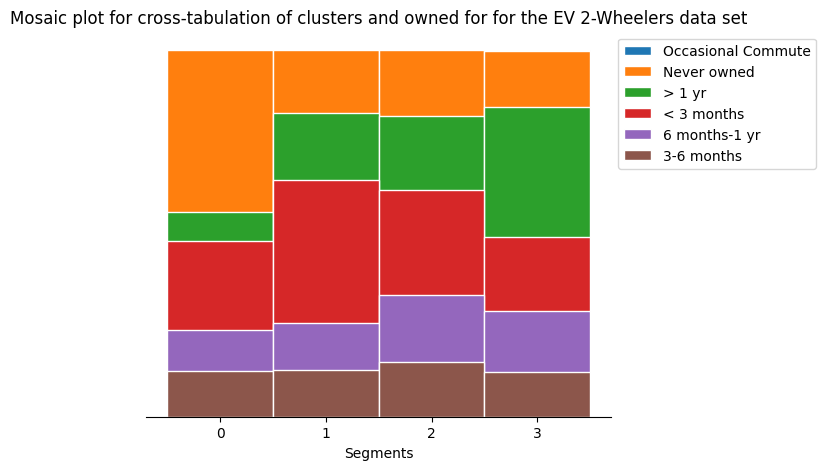

In [49]:
mosaicplot(owned_cluster, color_list[:6], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and owned for for the EV 2-Wheelers data set' )


**Above mosaic plot delineates the ownership duration of electric vehicles among segments. Segment 1 stands out, owning electric vehicles for more than a year, while Segment 0 has no prior ownership experience. Segment 2 members moderately own vehicles ranging from less than 3 months to over a year, and Segment 3 consumers have owned electric vehicles for a few days to less than 3 months.**

In [50]:
ridden_cluster = pd.crosstab(index = d_desc['cluster'], columns = d_desc['Ridden for'])
ridden_cluster

Ridden for,10000-15000 kms,5000-10000 kms,< 5000 kms,> 15000 kms,Never owned
cluster,,,,,
0,1,15,54,1,0
1,5,18,63,5,0
2,11,44,158,14,0
3,15,61,184,18,1


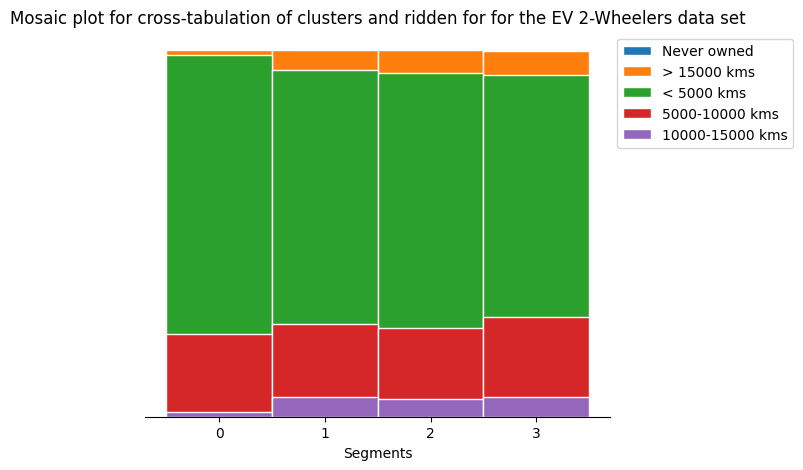

In [51]:
mosaicplot(ridden_cluster, color_list[:5], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and ridden for for the EV 2-Wheelers data set' )


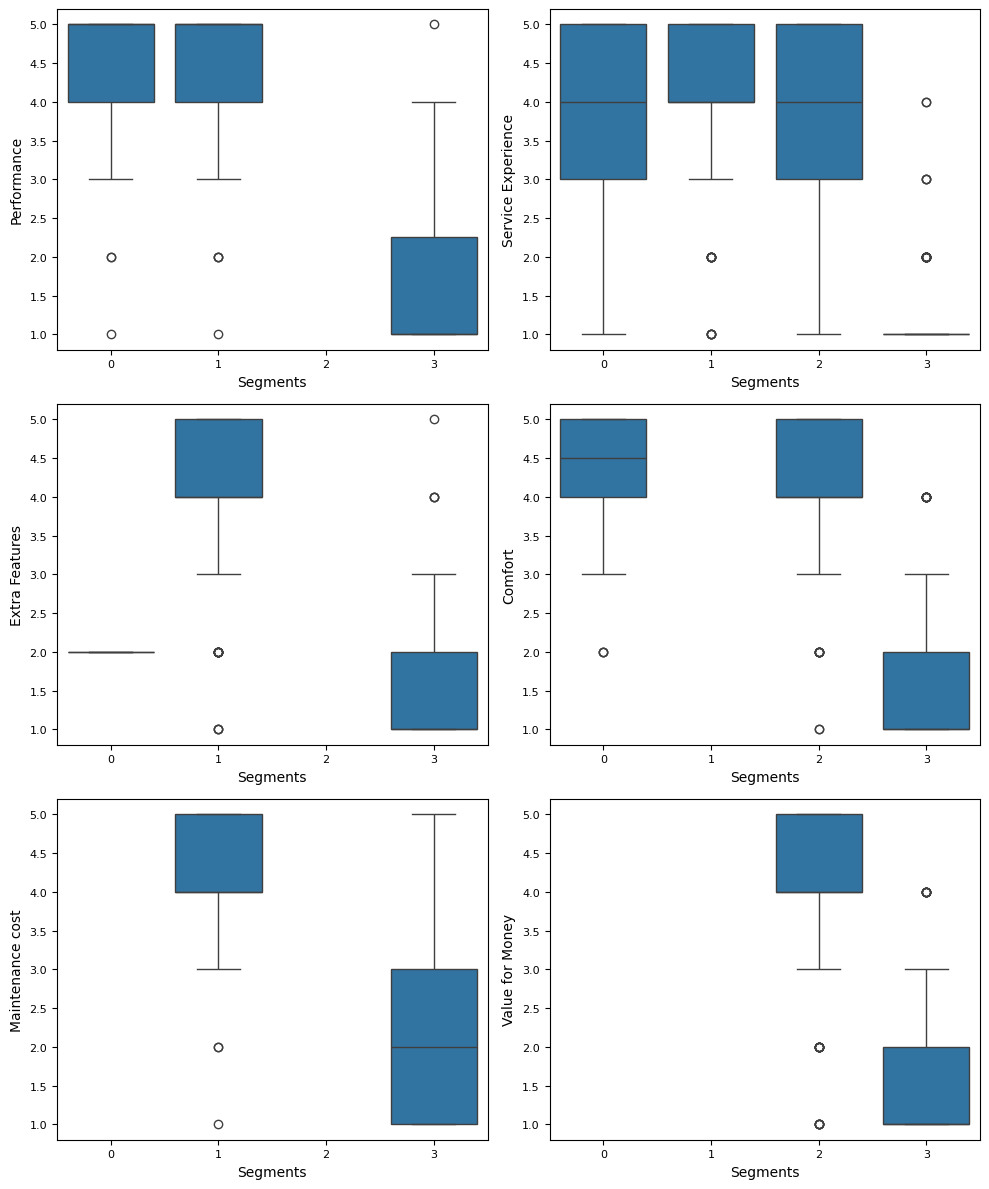

In [52]:
plt.figure(figsize = (10, 12))
for i, col in enumerate(d_desc.columns[-8:-2]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(d_desc, x = 'cluster', y =col)
    plt.xlabel("Segments", fontsize= 10)
    plt.ylabel(col, fontsize = 10)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
plt.tight_layout()
plt.show()

In summary, our in-depth analysis of India's electric vehicle market led us to identify Segment 1 as the optimal target. With a significant 39% consumer base, this segment represents a substantial market opportunity. By tailoring our electric two-wheeler specifications to meet the preferences of this segment, we ensure our products align seamlessly with the demands of a large customer base. This strategic decision is grounded in a thorough understanding of market segmentation, consumer behavior, and technical specifications.

These insights provide a clear direction for our market entry, emphasizing precision and relevance in both product development and marketing strategies. Moving forward, this approach equips us with a solid foundation, ensuring our offerings resonate effectively within India's evolving electric vehicle landscape.

By tailoring our products to meet the specific preferences of this segment and maintaining a competitive price range, we can ensure high market penetration and customer satisfaction. Additionally, the substantial size and expected growth of this segment align perfectly with our strategic objectives, positioning our venture optimally within India's rapidly expanding electric vehicle market.
